Import necessary packages.

In [1]:
using ImageCore          # Provides core functionalities for image processing
using ImageDraw          # Provides drawing functionalities for images
using ImageShow          #hide
using TestImages         # Supplies a collection of test images for experimentation

using TemplateMatching

Load the mandrill test image.

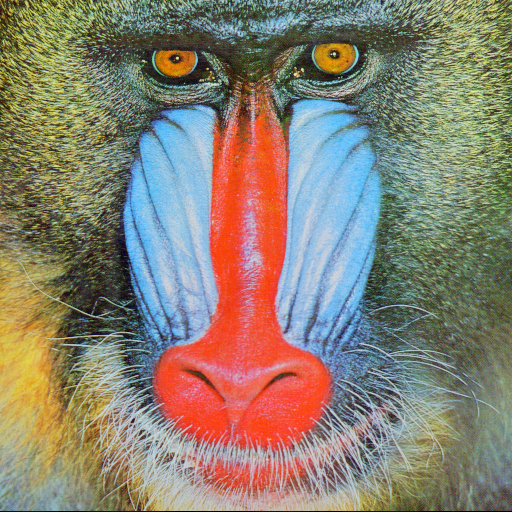

In [2]:
img = testimage("mandrill")

Extract a specific portion of the image to use as the template.

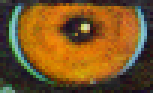

In [3]:
template = img[50:80, 150:200]

Convert the image and template to arrays of Float32 type.

In [4]:
img_array = channelview(img) .|> Float32
template_array = channelview(template) .|> Float32
nothing #hide

Perform template matching using Normalized Square Difference as the metric.

In [5]:
result = match_template(img_array, template_array, NormalizedSquareDiff())
nothing #hide

Drop singleton dimensions from the result for easier handling.

In [6]:
result = dropdims(result, dims = 1)
nothing #hide

Display the grayscale version of the result; darker areas indicate closer matches.

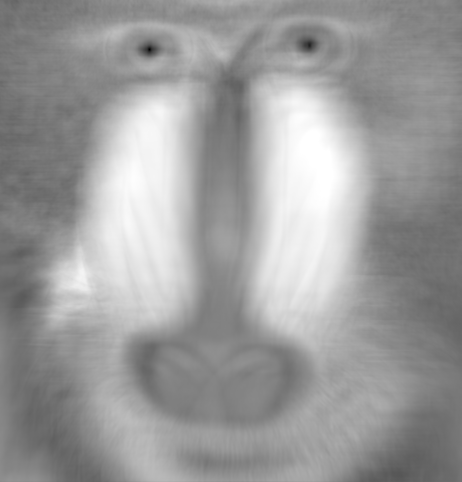

In [7]:
result .|> Gray

Identify the location of the best match (the smallest value in the case of Normalized Square Difference).

In [8]:
loc = argmin(result)

CartesianIndex(50, 150)

Draw a rectangle around the best match location on the original image.

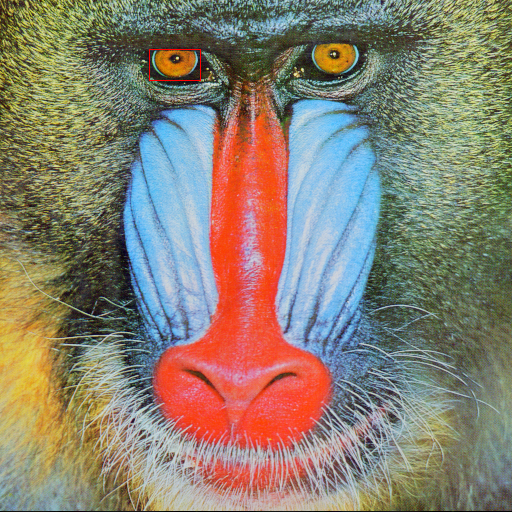

In [9]:
draw(
    img,
    RectanglePoints(loc[2], loc[1], loc[2] + size(template, 2), loc[1] + size(template, 1)),
    RGB(1, 0, 0)
)

Define a threshold for what is considered a "good" match.

In [10]:
threshold = 0.2
nothing #hide

Create a binary mask of the result where matches are ≤ the threshold, then convert it to grayscale for visualization.

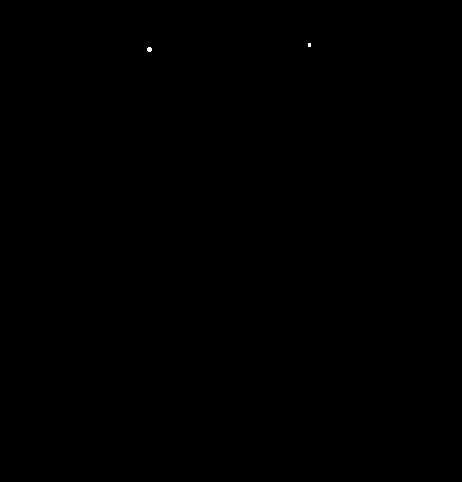

In [11]:
@. ifelse(result <= threshold, 1, 0) |> Gray

Make a copy of the original image to draw multiple rectangles on it.

In [12]:
img = copy(img)
nothing #hide

Iterate over all possible match locations in the result.
If the match quality at the current location is below the threshold, consider it a good match
and draw a rectangle on the source image.

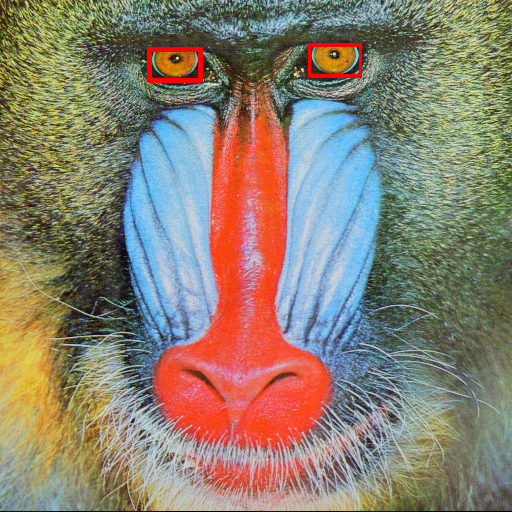

In [13]:
for i in CartesianIndices(result)
    if result[i] <= threshold
        local loc = i
        draw!(
            img,
            RectanglePoints(
                loc[2],
                loc[1],
                loc[2] + size(template, 2),
                loc[1] + size(template, 1)
            ),
            RGB(1, 0, 0)
        )
    end
end

img

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*